<a href="https://colab.research.google.com/github/divyalaldinani/Deep-Learning-in-PyTorch/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Using Numpy to understand what's done

In [41]:
import numpy as np

X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

def forward(x):
    return w*x

def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

def gradient(x, y, y_predicted):
    return np.dot(2*X, (y_predicted-y)).mean()


print(f"Prediction before training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000


In [42]:
lr = 0.01
n_iters = 20

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)

    l = loss(Y, y_pred)

    dw = gradient(X, Y, y_pred)

    w -= lr * dw

    print(f"epoch: {epoch+1}, w = {w:.3f}, loss = {l:.8f}")

epoch: 1, w = 1.200, loss = 30.00000000
epoch: 2, w = 1.680, loss = 4.79999924
epoch: 3, w = 1.872, loss = 0.76800019
epoch: 4, w = 1.949, loss = 0.12288000
epoch: 5, w = 1.980, loss = 0.01966083
epoch: 6, w = 1.992, loss = 0.00314574
epoch: 7, w = 1.997, loss = 0.00050331
epoch: 8, w = 1.999, loss = 0.00008053
epoch: 9, w = 1.999, loss = 0.00001288
epoch: 10, w = 2.000, loss = 0.00000206
epoch: 11, w = 2.000, loss = 0.00000033
epoch: 12, w = 2.000, loss = 0.00000005
epoch: 13, w = 2.000, loss = 0.00000001
epoch: 14, w = 2.000, loss = 0.00000000
epoch: 15, w = 2.000, loss = 0.00000000
epoch: 16, w = 2.000, loss = 0.00000000
epoch: 17, w = 2.000, loss = 0.00000000
epoch: 18, w = 2.000, loss = 0.00000000
epoch: 19, w = 2.000, loss = 0.00000000
epoch: 20, w = 2.000, loss = 0.00000000


### Using PyTorch

In [51]:
import torch

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype = torch.float32, requires_grad=True) # weights -> will be updated via backprop

def forward(x):
    return w*x

In [52]:
n_iters = 100
lr = 0.01


for epoch in range(n_iters):
    y_pred = forward(X)

    l =loss(Y, y_pred)

    l.backward() # dl/dw

    with torch.no_grad(): # not a part of computation graph
        w -= lr * w.grad

    w.grad.zero_() # otherwise it will accumulate gradients
    if epoch % 10 == 0 :
      print(f"epoch: {epoch+1}, weight: {w:.3f}, loss: {l:.8f}")

epoch: 1, weight: 0.300, loss: 30.00000000
epoch: 11, weight: 1.665, loss: 1.16278565
epoch: 21, weight: 1.934, loss: 0.04506890
epoch: 31, weight: 1.987, loss: 0.00174685
epoch: 41, weight: 1.997, loss: 0.00006770
epoch: 51, weight: 1.999, loss: 0.00000262
epoch: 61, weight: 2.000, loss: 0.00000010
epoch: 71, weight: 2.000, loss: 0.00000000
epoch: 81, weight: 2.000, loss: 0.00000000
epoch: 91, weight: 2.000, loss: 0.00000000


### Whats a Computation Graph?

A computation graph (also called a computational graph or computational DAG) is a dynamic structure that PyTorch builds automatically to track operations on tensors. It helps PyTorch compute gradients efficiently using automatic differentiation.

In [57]:
# !pip install torchviz

In [54]:
from torchviz import make_dot


In [55]:
make_dot(Y, params={"x": X}).render("computation_graph", format="png", view=True)

'computation_graph.png'

In [58]:
import torch
from torchviz import make_dot  # Import visualization tool

x = torch.tensor(3.0, requires_grad=True)

y = x**2 + 2*x + 1

y.backward()

# Visualize computation graph
make_dot(y, params={"x": x}).render("computation_graph", format="png", view=True)

'computation_graph.png'

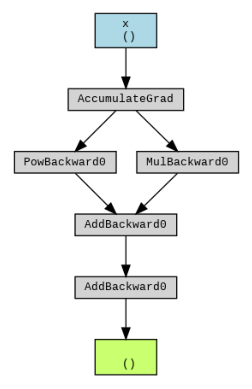

In [62]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img=mpimg.imread('computation_graph.png')
plt.imshow(img)
plt.axis('off')
plt.show()